# 2019_06_02 Reinforcement Learning Basic 1

* Name : Jikhan Jeong
* Reference:  https://hunkim.github.io/ml/
* Q-learning in grid world

In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr
import sympy

* environment setup

In [24]:

# when the value is the same, ramdon selection among possible sets

def rargmax(vector):
    """argmax that chooses randomly among eligible maxium indices. caring for the initial values (0,0,0,0)"""
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

register(
    id='FrozenLake-v7',
    entry_point ='gym.envs.toy_text:FrozenLakeEnv',
    kwargs ={'map_name':'4x4',
            'is_slippery':False} 
)
env = gym.make('FrozenLake-v7')

* Q algorithm

In [26]:
from sympy import *
init_printing(use_unicode=True)

In [31]:
# initialize q table with zeros

# making array with zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) 

# how many loops, number iterations
num_episodes = 2000

# create the lists to contain total rewards and steps per episode

rList=[]
for i in range(num_episodes):
    # reset environment and get first new obs
    state = env.reset()
    rAll = 0
    done = False
    
    # the Q-table Learning algorithm
    # while not -> until arrive in the terminal 
    
    
    while not done:
        action = rargmax(Q[state,:])
        
        # if the state value of each action is the same, then moving randomly
        # Get new state and reward from environment
        # Deterministic Transition
        
        new_state, reward, done,_= env.step(action)
        
        # Update Q-table with new knowledge using learning rate
        
        Q[state, action] = reward + np.max(Q[new_state,:])
        
        # reward 1 means success 0 fail during 2000 iterations
        rAll += reward 
        state = new_state
        
    rList.append(rAll)

* reporting

In [32]:
print("Success rate" + str(sum(rList)/2000))

Success rate0.8945


In [34]:
print("Final Q value", Q)
# 16 states = 4 x 4, each states has 4 possible action [r,l,up,down]

Final Q value [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


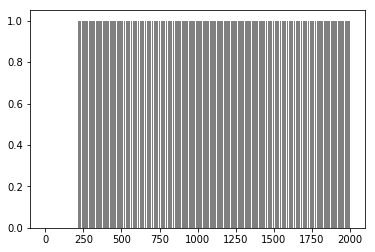

In [37]:
plt.bar(range(len(rList)), rList, color="grey")
plt.show()